In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [0]:
from sklearn.preprocessing import LabelEncoder ##encoding
from sklearn.model_selection import train_test_split #splliting data
from sklearn.decomposition import PCA #feature enginering
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.linear_model import LogisticRegression #building model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [0]:
cancer=pd.read_csv('wisc_bc_data.csv')

In [0]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


In [0]:
cancer.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [0]:
cancer.where(cancer==0).count()

id                    0
diagnosis             0
radius_mean           0
texture_mean          0
perimeter_mean        0
area_mean             0
smoothness_mean       0
compactness_mean      0
concavity_mean       13
points_mean          13
symmetry_mean         0
dimension_mean        0
radius_se             0
texture_se            0
perimeter_se          0
area_se               0
smoothness_se         0
compactness_se        0
concavity_se         13
points_se            13
symmetry_se           0
dimension_se          0
radius_worst          0
texture_worst         0
perimeter_worst       0
area_worst            0
smoothness_worst      0
compactness_worst     0
concavity_worst      13
points_worst         13
symmetry_worst        0
dimension_worst       0
dtype: int64

In [0]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [0]:
col=cancer.select_dtypes(include=['int64','float64']).columns


In [0]:
for i in col:
    cancer[i].replace(to_replace=0,value=cancer[i].median(),inplace=True)
   

In [0]:
cancer.where(cancer==0).count()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [0]:
## encoding

In [0]:
le=LabelEncoder()

In [0]:

#num=horse.select_dtypes(include=['int64','float64']).columns

In [0]:
cancer['diagnosis']=le.fit_transform(cancer['diagnosis'])

In [0]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,1,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,0,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
3,9047,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
4,85715,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790


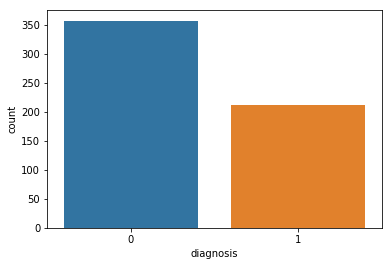

In [0]:
sns.countplot(cancer['diagnosis'])

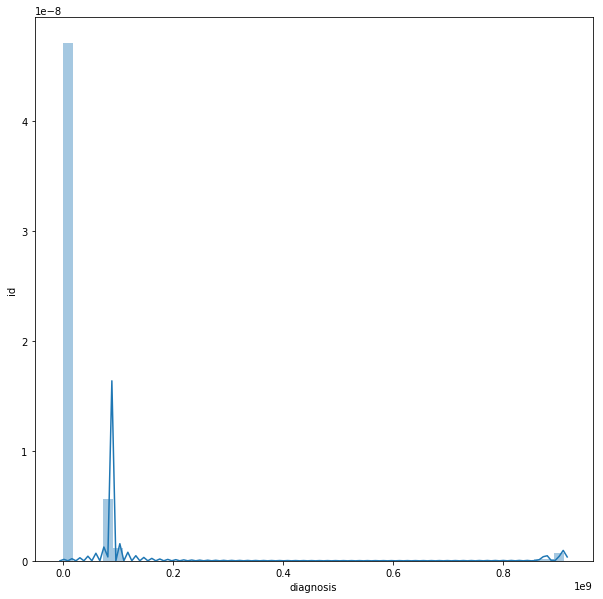

<Figure size 720x720 with 0 Axes>

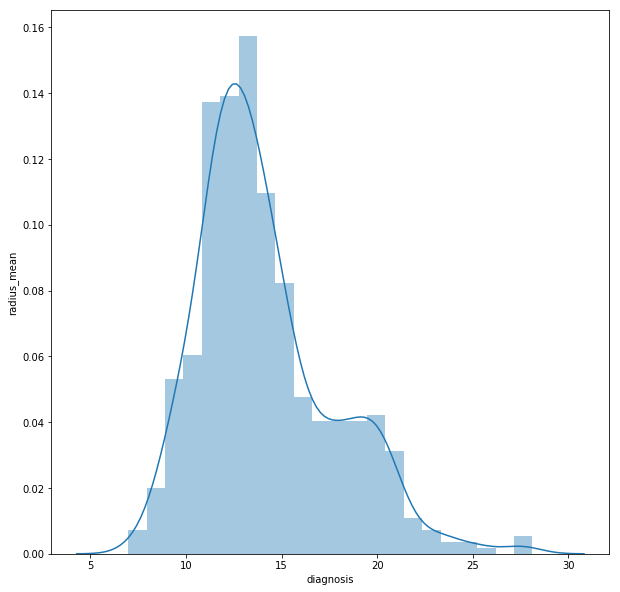

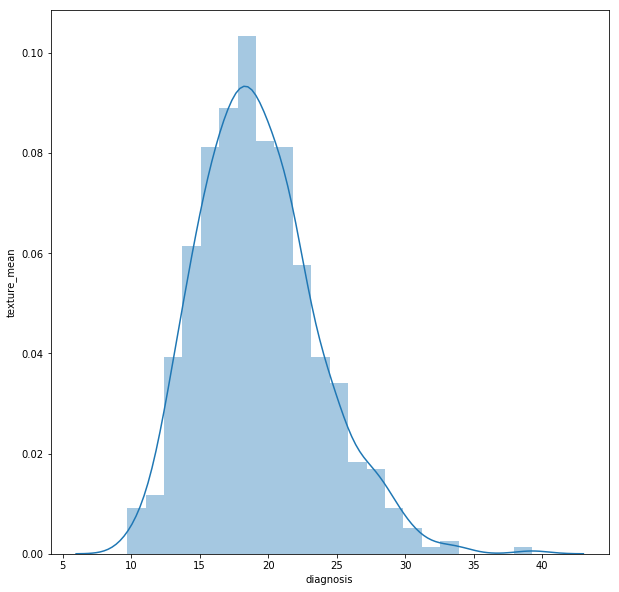

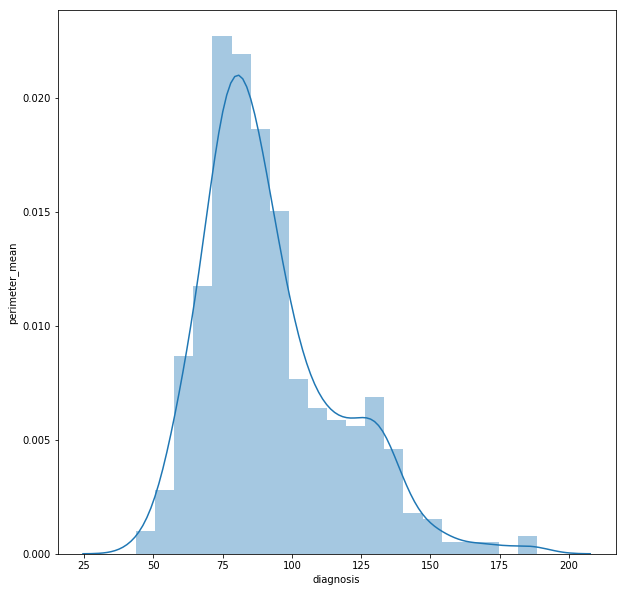

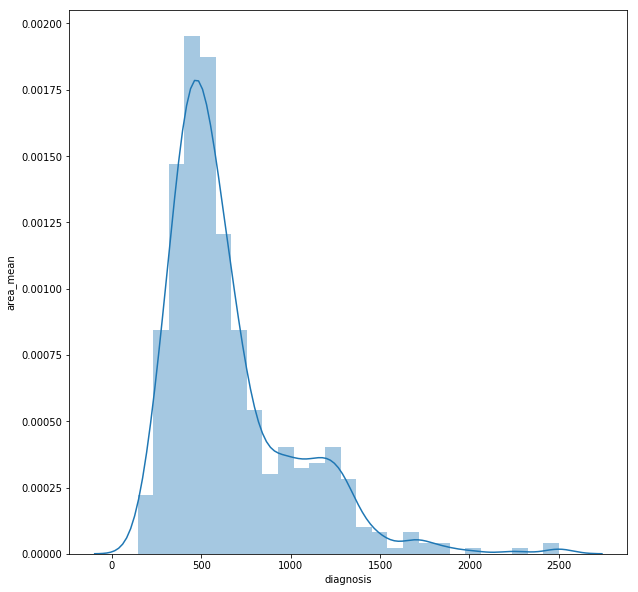

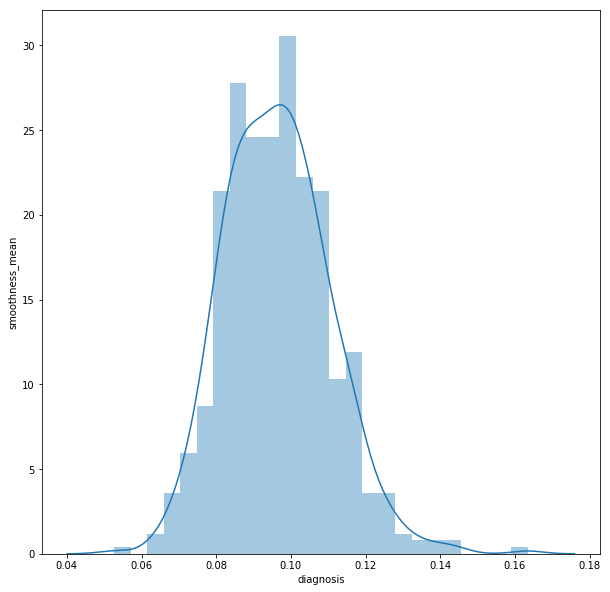

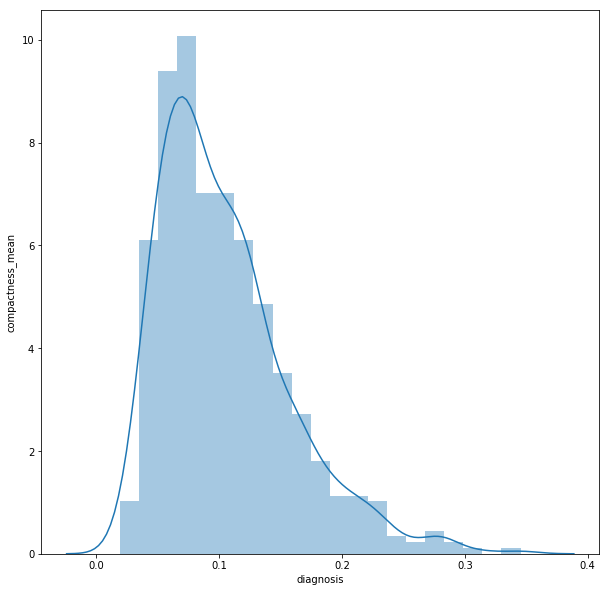

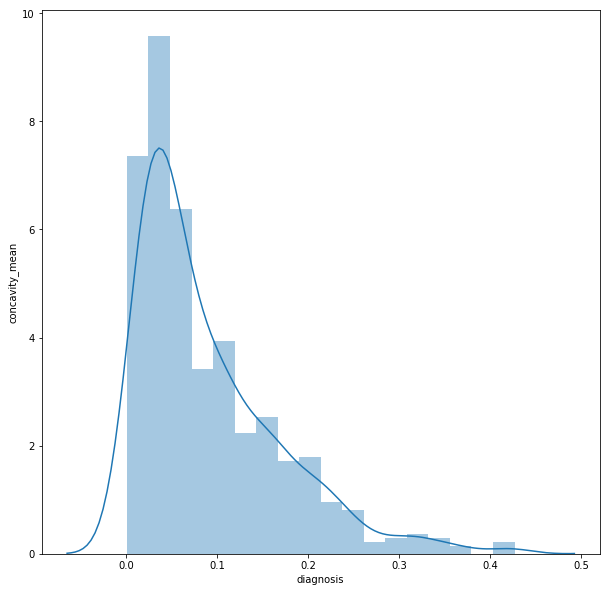

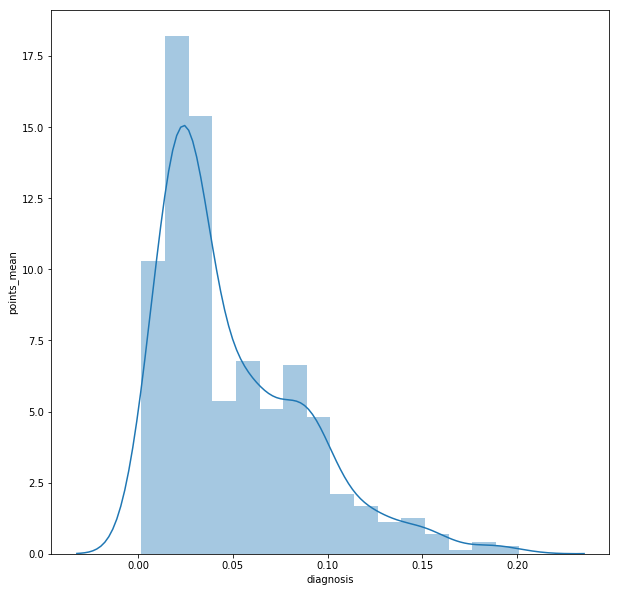

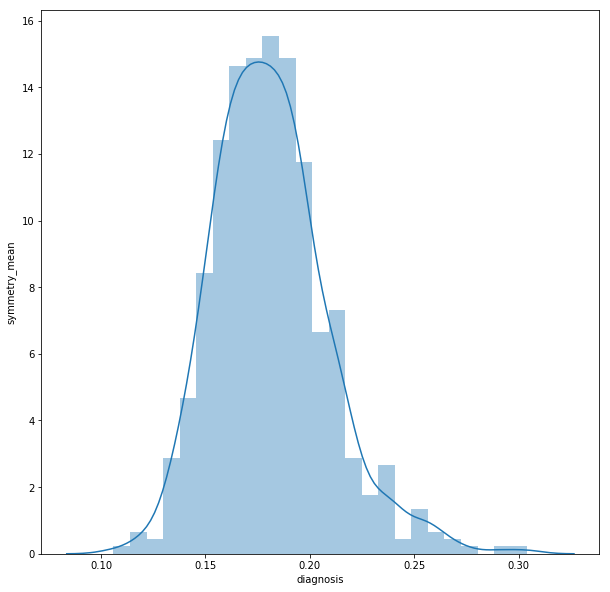

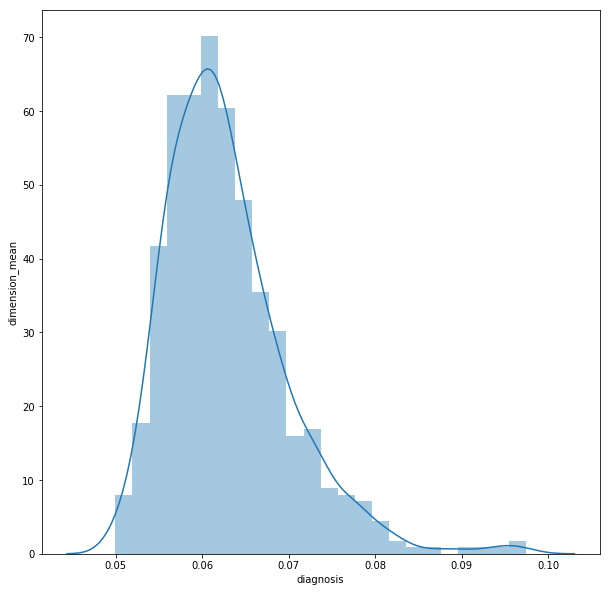

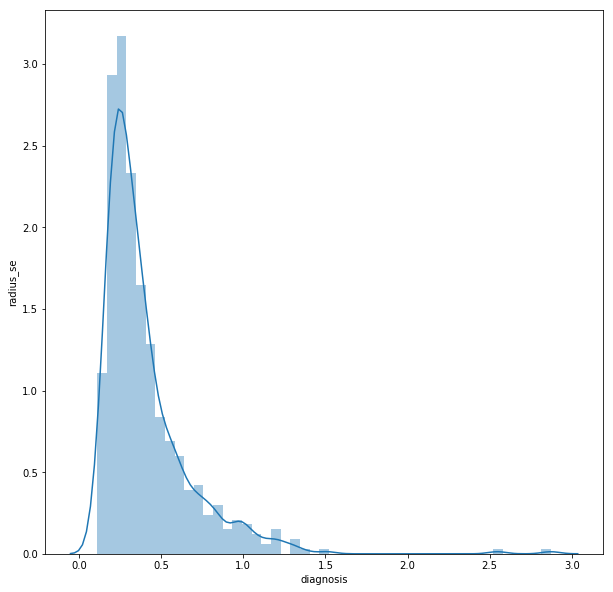

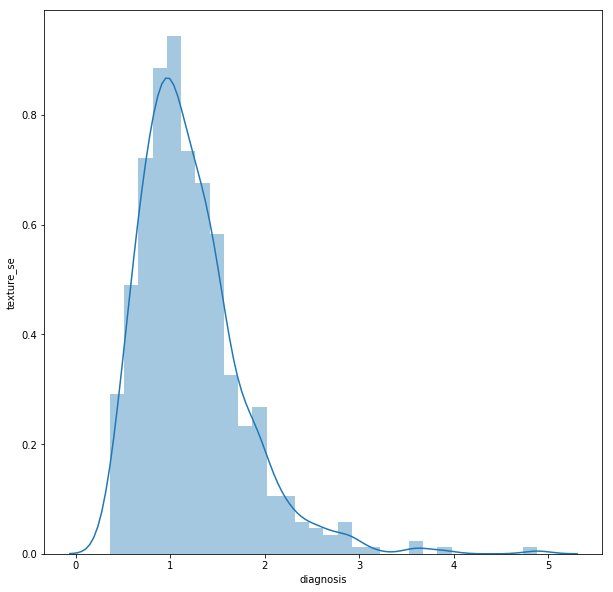

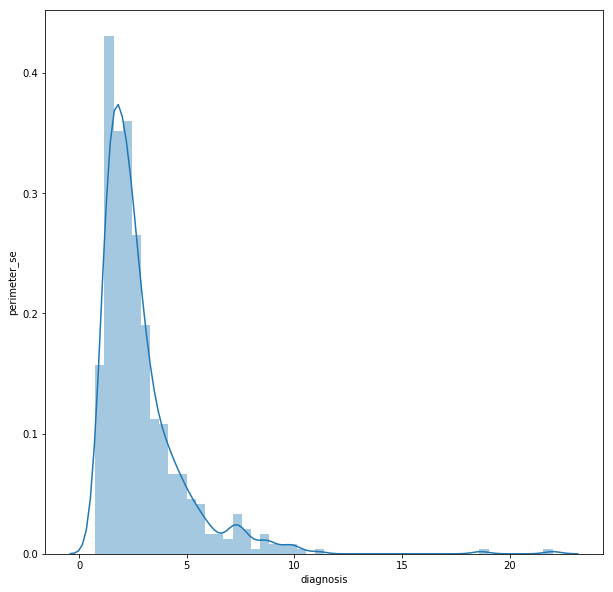

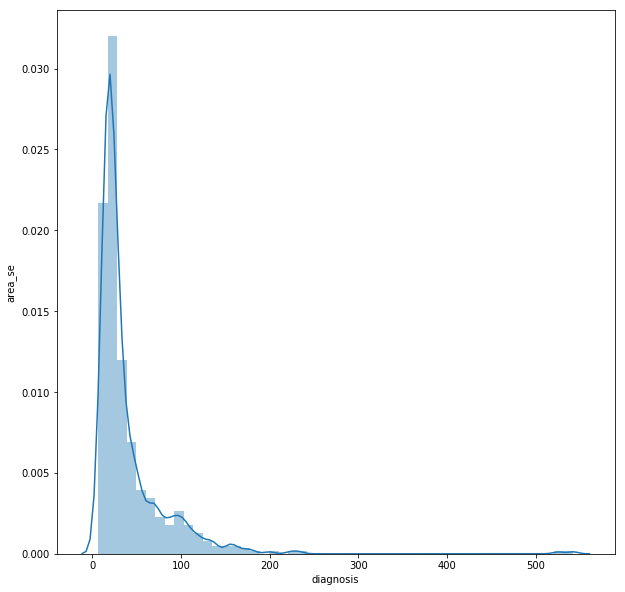

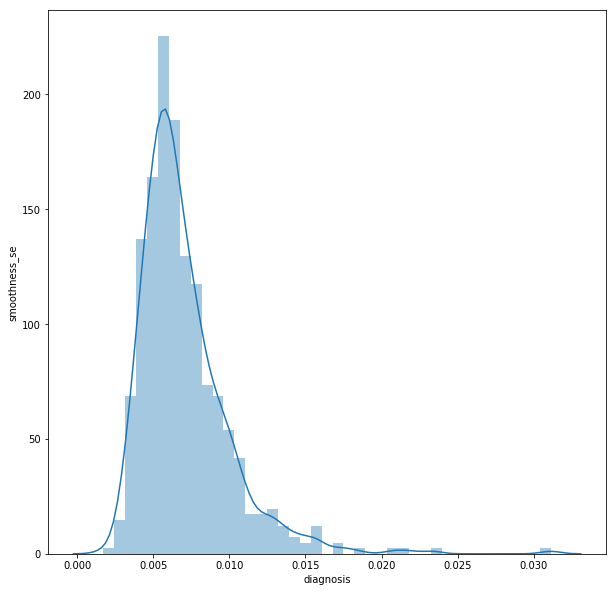

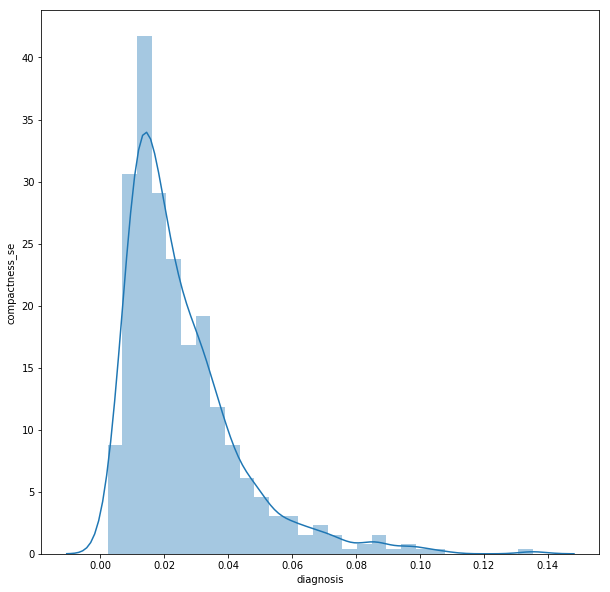

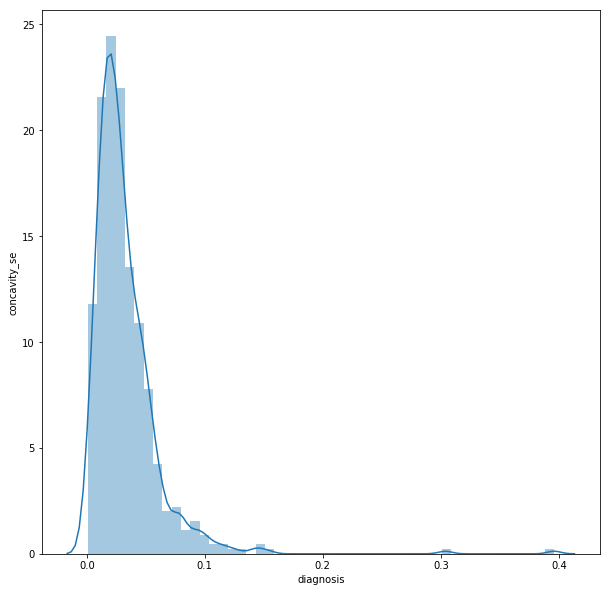

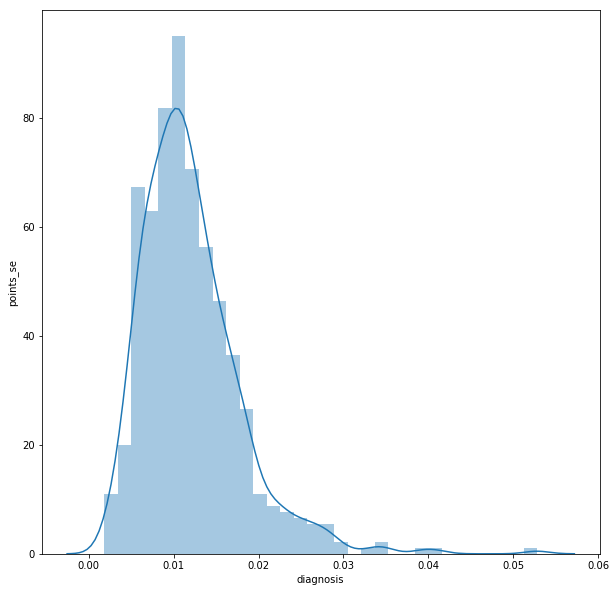

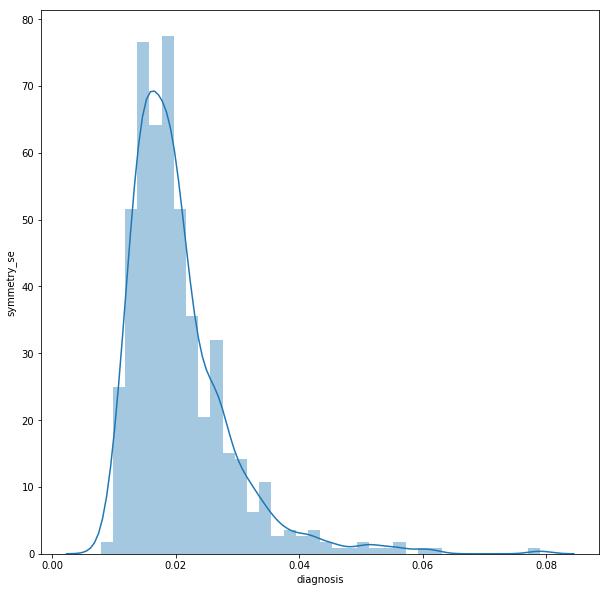

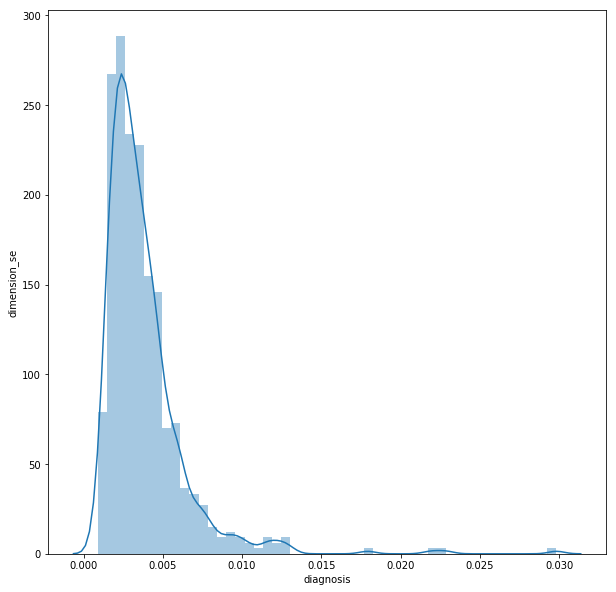

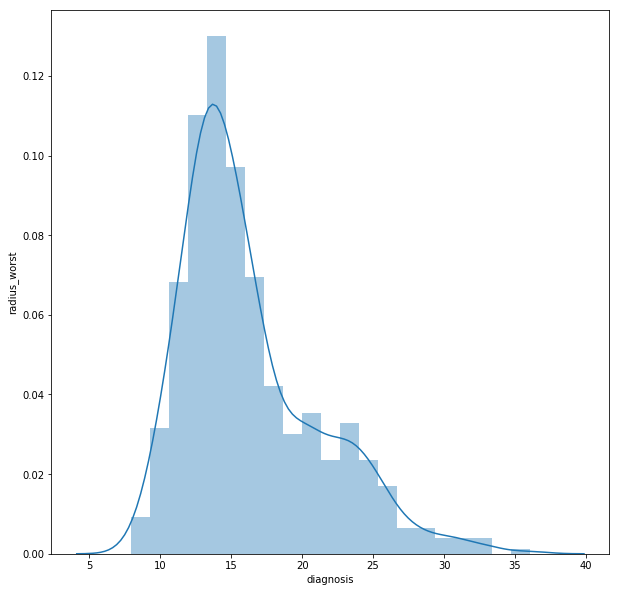

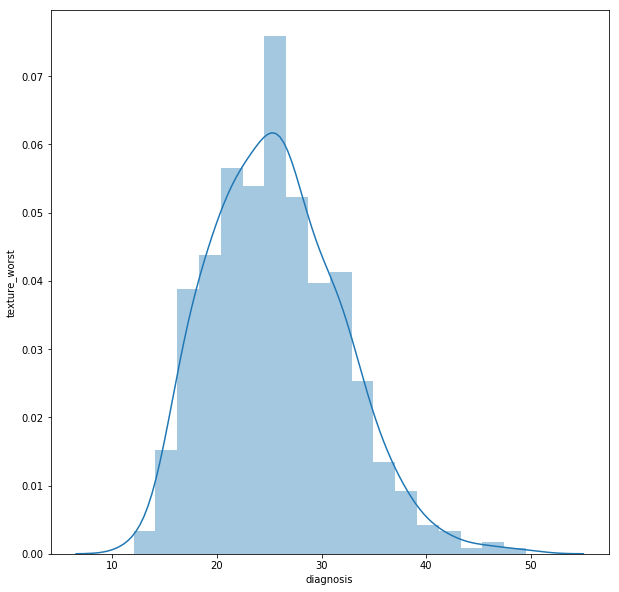

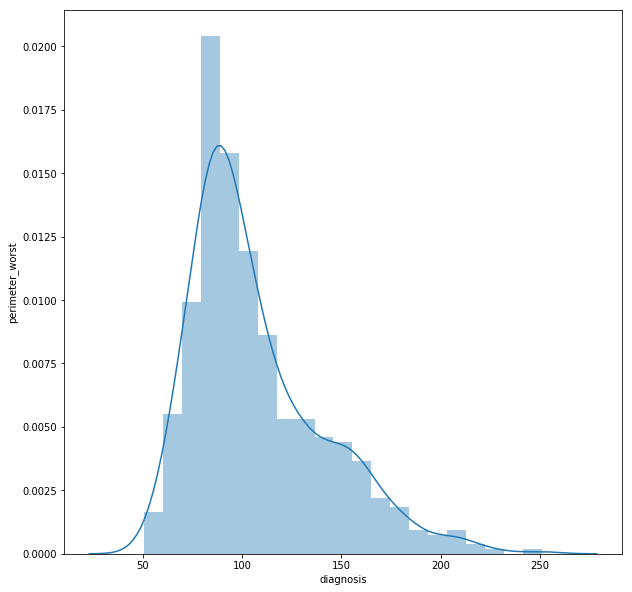

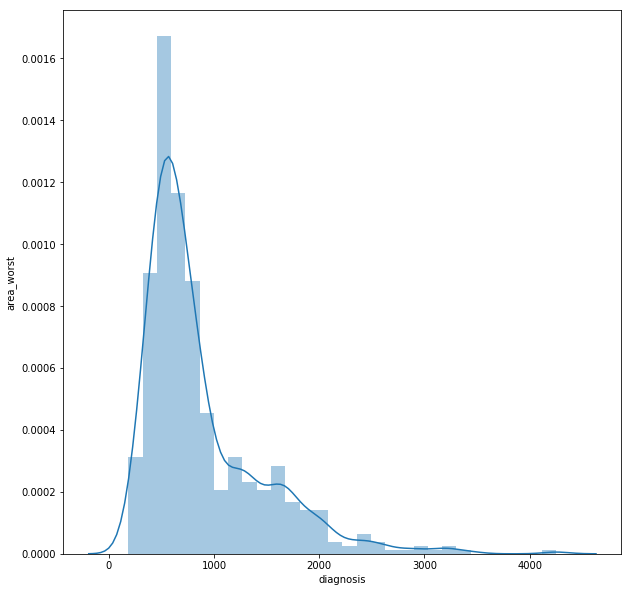

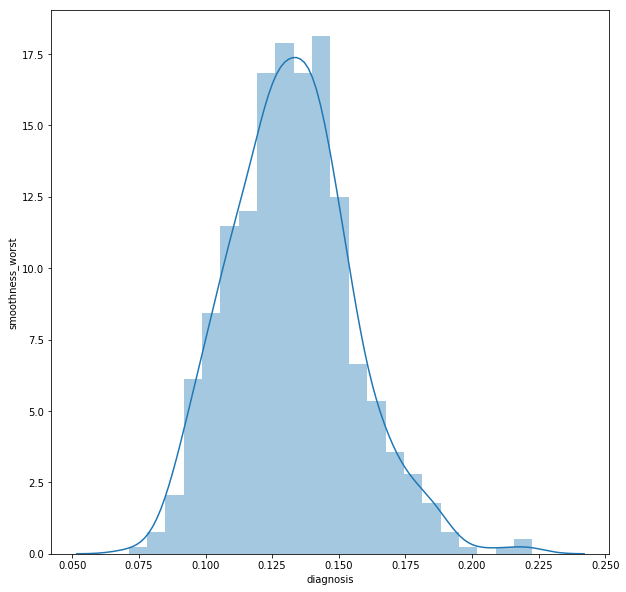

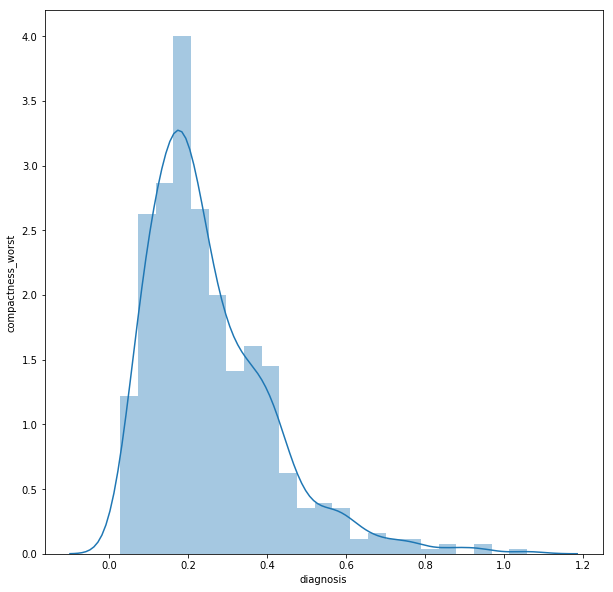

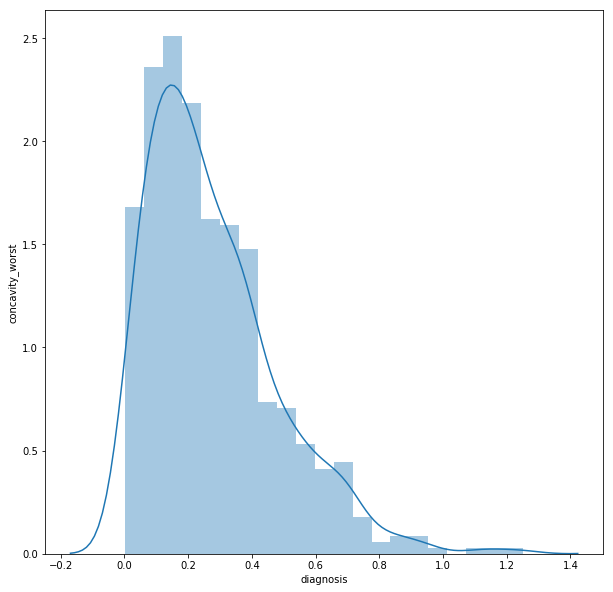

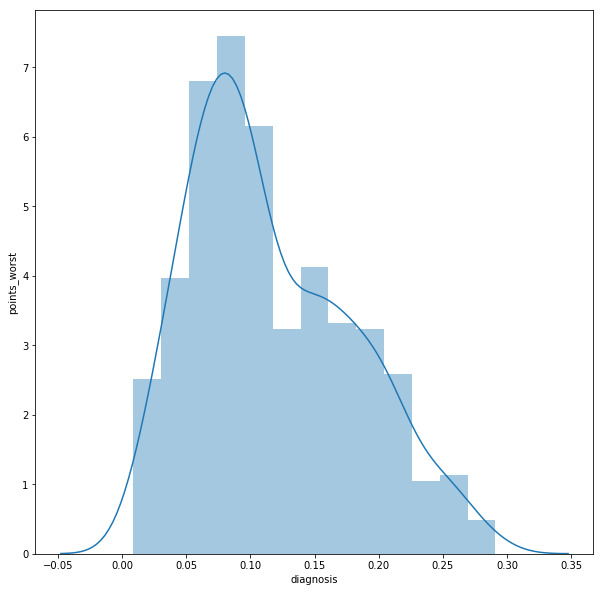

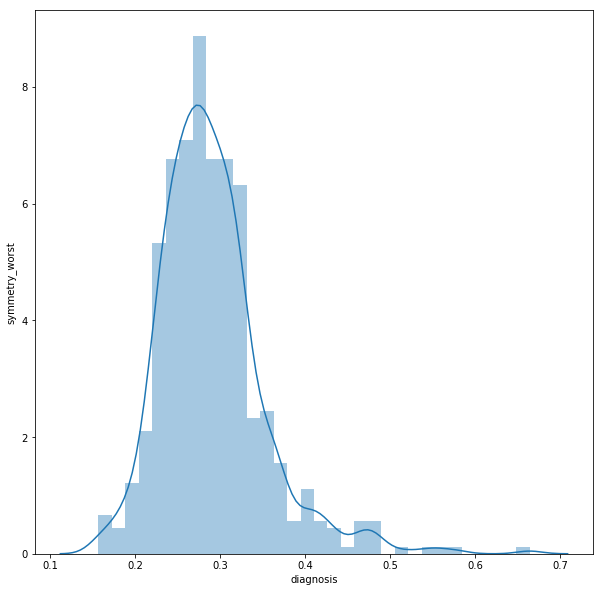

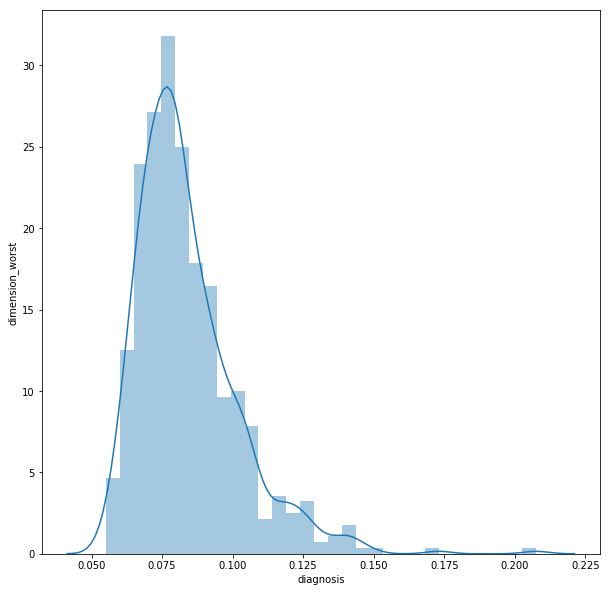

In [0]:
for column in list(cancer.columns):
    plt.figure(figsize=(10,10))
    if column=='diagnosis':
        continue
    else:
        sns.distplot(cancer[column])
        plt.xlabel('diagnosis')
        plt.ylabel(column)

In [0]:
features=cancer.columns.drop("diagnosis")
target=["diagnosis"]
features,target

(Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
        'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
        'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
        'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'points_worst', 'symmetry_worst', 'dimension_worst'],
       dtype='object'), ['diagnosis'])

In [0]:
tar=pd.DataFrame()

In [0]:
tar=cancer['diagnosis']

In [0]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(cancer[features])

In [0]:
bc_enc=pd.DataFrame()
c=0
for i in features:
    bc_enc[i]=scaled_values[:,c]
    c+=1

In [0]:
bc_enc.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.000000e+00,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.342420,0.396382,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.301767,0.505364,0.250739,0.164961
1,2.666486e-07,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.051414,0.049451,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.093392,0.159049,0.146659,0.092549
2,2.688432e-07,0.377633,0.317552,0.367908,0.230668,0.336643,0.241856,0.137777,0.232448,0.413636,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.267495,0.142826,0.496506,0.275379,0.194674
3,4.136894e-07,0.282029,0.218465,0.272200,0.154443,0.416719,0.211582,0.075727,0.110601,0.340909,...,0.210957,0.293177,0.195627,0.097252,0.303969,0.163489,0.143306,0.266125,0.341415,0.152827
4,8.454296e-05,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.286096,0.358910,0.539394,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.377711,0.398955,0.708746,0.460280,0.412305


In [0]:
X_train,X_test,y_train,y_test = train_test_split(bc_enc,tar,test_size=0.20,random_state=100)

In [0]:
# X=cancer.drop('diagnosis',1)
# y=cancer['diagnosis']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=5)
X_train2 = lda.fit_transform(X_train, y_train)
X_test2 = lda.transform(X_test)
variance1=lda.explained_variance_ratio_
variance1

array([1.])

In [0]:
pca=PCA(n_components=5)
X_train1=pca.fit_transform(X_train)
X_test1=pca.fit_transform(X_test)
variance=pca.explained_variance_ratio_
variance

array([0.56451162, 0.15679841, 0.07060718, 0.05076073, 0.03799613])

In [0]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()
model4 = SVC(kernel="rbf")

In [0]:
names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for i in [model1,model2,model3,model4]:
    
    i.fit(X_train1,y_train)
    train_accuracy = i.score(X_train1,y_train)
    test_accuracy = i.score(X_test1,y_test)
    print(names[j])
    j+=1
    print(train_accuracy,test_accuracy)

Logistic Regression
0.9516483516483516 0.9385964912280702
Decision Tree
1.0 0.9035087719298246
KNN
0.9582417582417583 0.9473684210526315
SVC
0.9538461538461539 0.9385964912280702


In [0]:
names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for i in [model1,model2,model3,model4]:
    
    i.fit(X_train2,y_train)
    train_accuracy = i.score(X_train2,y_train)
    test_accuracy = i.score(X_test2,y_test)
    print(names[j])
    j+=1
    print(train_accuracy,test_accuracy)

Logistic Regression
0.9758241758241758 0.9649122807017544
Decision Tree
1.0 0.9649122807017544
KNN
0.978021978021978 0.9824561403508771
SVC
0.9736263736263736 0.9649122807017544


In [0]:
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
k_fold = KFold(n_splits=8,shuffle=False,random_state=100)

names=['Logistic Regression','Decision Tree','KNN','SVC']
j=0
for k in [model1,model2,model3,model4]:
    train_accuracy = []
    val_accuracy = []
    for i,(train,val) in enumerate(k_fold.split(features,target)): 
        k.fit(features.iloc[train],target.iloc[train])
        train_accuracy.append(k.score(features.iloc[train],target.iloc[train]))
        val_accuracy.append(k.score(features.iloc[val],target.iloc[val]))
    print(names[j])
    j+=1
    print(np.mean(train_accuracy),np.mean(val_accuracy))
    import matplotlib.pyplot as plt
    fig, (ax1) = plt.subplots(1,4) #, sharey=True)
    fig.set_figwidth(10)
    fig.set_figheight(7)
    ax1.boxplot(val_accuracy1,vert=False)
    #ax2.boxplot(cars_df["MPG.city"],vert=False)C
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    #ax = fig.add_subplot(111)
    val_accuracy1=pd.DataFrame(val_accuracy)
    val_accuracy1.plot(kind="box",figsize = (10,7))
    plt.xlabel(k)
    #plt.boxplot(val_accuracy)
    ax.set_xticklabels(names)
    plt.show()
    #names1=pd.DataFrame(names)


ValueError: Found input variables with inconsistent numbers of samples: [31, 1]